In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
pd.options.display.float_format = '{:.2f}'.format

### Columns : 
<pre>
Country
Age
Gender
Income
Customer_Segment
Year
Month
Total_Purchases
Amount
Total_Amount
Product_Category
Product_Brand
Product_Type
Feedback
Payment_Method
Order_Status
Ratings	products
</pre>

In [2]:
# Get the data
df = pd.read_csv("new_retail_data.csv")

In [3]:
# Clean the data by dropping rows with missing values and columns that are not essential.
df = df.dropna()
df = df.drop(columns=["Name", "Email", "Customer_ID", "Transaction_ID", "Address", "Phone", "Date", "Time", "Zipcode", "State", "City", "Shipping_Method"])

In [4]:
# Grab Male Customers and Female Customers for Analysis
customers_male = df[df['Gender'] == 'Male']
customers_female = df[df['Gender'] == 'Female']

In [5]:
df.head()

,Country,Age,Gender,Income,Customer_Segment,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Payment_Method,Order_Status,Ratings,products
0,Germany,21.0,Male,Low,Regular,2023.0,September,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Debit Card,Shipped,5.0,Cycling shorts
1,UK,19.0,Female,Low,Premium,2023.0,December,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Credit Card,Processing,4.0,Lenovo Tab
2,Australia,48.0,Male,Low,Regular,2023.0,April,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Credit Card,Processing,2.0,Sports equipment
3,Canada,56.0,Male,High,Premium,2023.0,May,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,PayPal,Processing,4.0,Utility knife
4,UK,22.0,Male,Low,Premium,2024.0,January,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Cash,Shipped,1.0,Chocolate cookies


# Which gender dominates the different income categories

In [6]:
# Grab count of each income category of Male customers; divide by total to get percentage
income_counts_male = customers_male['Income'].value_counts()
income_counts_male = income_counts_male / income_counts_male.sum()

In [7]:
# Grab count of each income category of Female customers; divide by total to get percentage
income_counts_female = customers_female['Income'].value_counts()
income_counts_female = income_counts_female / income_counts_female.sum()

In [8]:
difference = income_counts_male - income_counts_female
for category in difference:
    if category > 0:
        print(f"Predominantly Male by {category:.5f}%")
    else:
        print(f"Predominantly Female by {category:.5f}%")

# CONCLUSION: Male are predominantly in the higher income categories. Female are predominantly in the lower income categories.
# Visualization found in next script.


Predominantly Female by -0.01691%
Predominantly Female by -0.00544%
Predominantly Male by 0.02235%


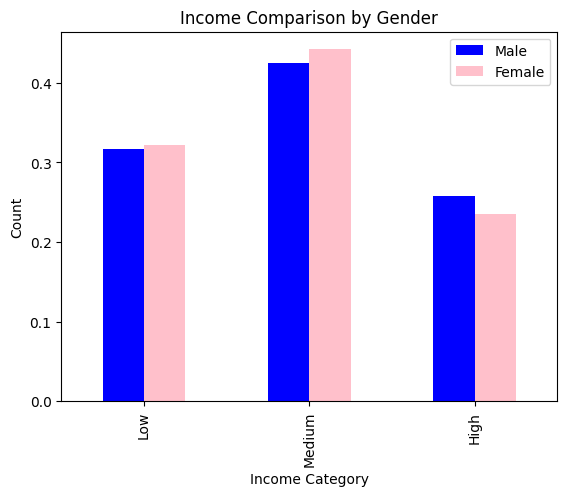

In [9]:
# Combine male and female counts into a DataFrame for side by side comparison
comparison = pd.DataFrame({
    'Male': income_counts_male.reindex(['Low', 'Medium', 'High']),
    'Female': income_counts_female.reindex(['Low', 'Medium', 'High'])
})
comparison.plot(kind='bar', color=['blue', 'pink'], title='Income Comparison by Gender')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

# Age Distribution

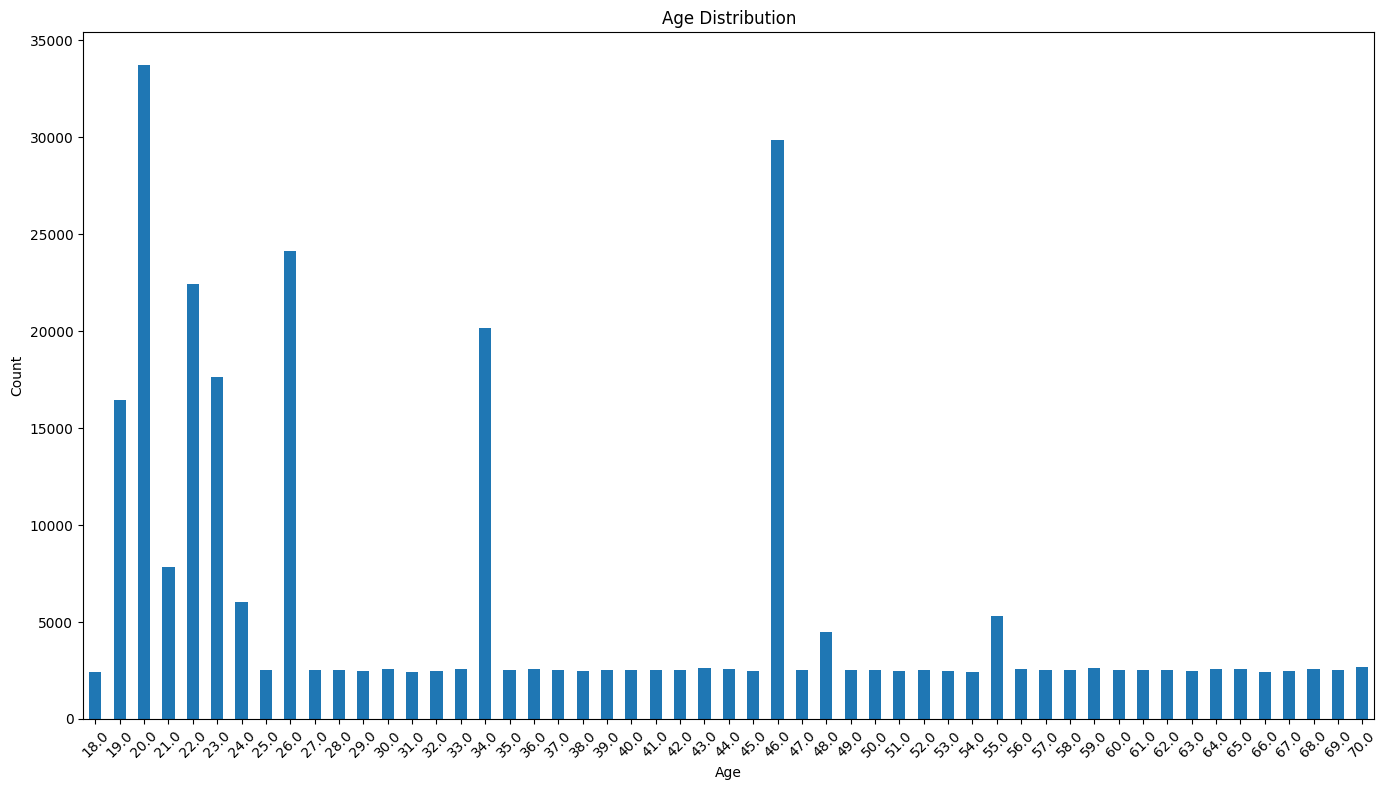

In [29]:
age_distribution = df['Age'].value_counts()
age_distribution = age_distribution.sort_index()
plt.figure(figsize=(14, 8))
age_distribution.plot(kind='bar', title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Age Average

In [31]:
age_average = df['Age'].mean()
age_average

35.46576684778726

# Consumption by Gender

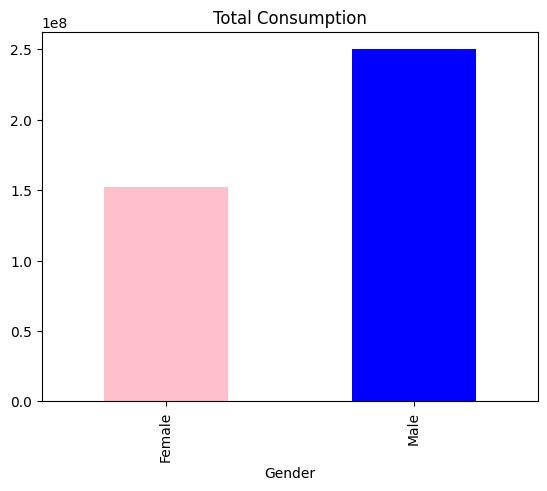

In [49]:
consumption_by_gender = df.groupby('Gender')['Total_Amount'].sum()
consumption_by_gender.plot(kind='bar', color=['pink', 'blue'], title='Total Consumption')
plt.show()

# Consumption by Gender Average

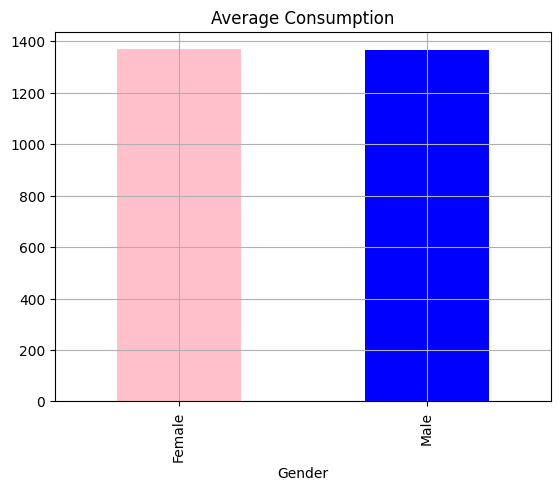

In [55]:
consumption_by_gender_avg = df.groupby('Gender')['Total_Amount'].mean()
consumption_by_gender_avg.plot(kind='bar', color=['pink', 'blue'], title='Average Consumption')
plt.grid(True)
plt.show()


# Consumption by Income Group

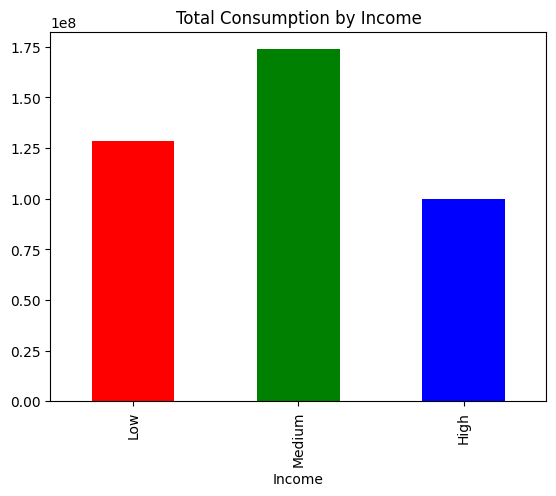

In [48]:
consumption_by_income = df.groupby('Income')['Total_Amount'].sum()
consumption_by_income = consumption_by_income.reindex(['Low', 'Medium', 'High'])
consumption_by_income.plot(kind='bar', color=['red', 'green', 'blue'], title='Total Consumption by Income')
plt.show()


# Consumption by Income Group Average

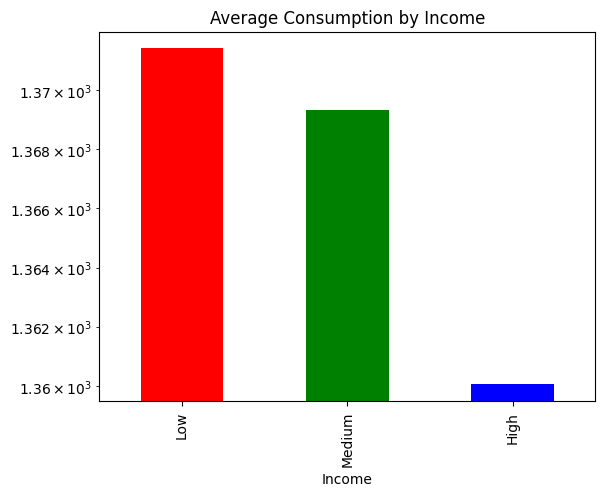

In [ ]:
consumption_by_income_avg = df.groupby('Income')['Total_Amount'].mean()
consumption_by_income_avg = consumption_by_income_avg.reindex(['Low', 'Medium', 'High'])
consumption_by_income_avg.plot(kind='bar', color=['red', 'green', 'blue'], title='Average Consumption by Income')
plt.yscale('log') # Values are very similar, so log scale is used to better visualize the differences.
plt.show()

# Consumption by Gender and Income

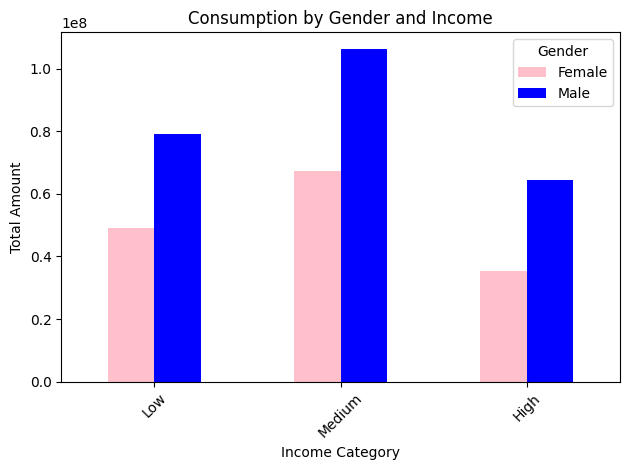

In [71]:
consumption_gender_income = df.groupby(['Gender', 'Income'])['Total_Amount'].sum()
plot_data = consumption_gender_income.unstack(level=0)
plot_data = plot_data.reindex(['Low', 'Medium', 'High'])
ax = plot_data.plot(kind='bar', color=['pink', 'blue'])
plt.title("Consumption by Gender and Income")
plt.xlabel("Income Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Consumption by Gender and Income Average

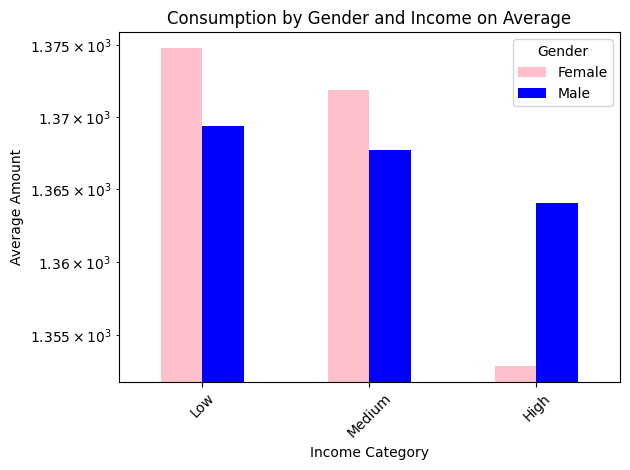

In [ ]:
consumption_gender_income_avg = df.groupby(['Gender', 'Income'])['Total_Amount'].mean()
plot_data = consumption_gender_income_avg.unstack(level=0)
plot_data = plot_data.reindex(['Low', 'Medium', 'High'])
ax = plot_data.plot(kind='bar', color=['pink', 'blue'])
plt.title("Consumption by Gender and Income on Average")
plt.yscale('log') # Readability is improved with log scale.
plt.xlabel("Income Category")
plt.ylabel("Average Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Which country consumes the most on average
Between Germany, UK, Australia, Canada, and USA

In [10]:
country_consumption_avg = df.groupby('Country')['Total_Amount'].mean()
print(country_consumption_avg)

Country
Australia    1369.214695
Canada       1363.451709
Germany      1368.153843
UK           1374.901131
USA          1363.941214
Name: Total_Amount, dtype: float64


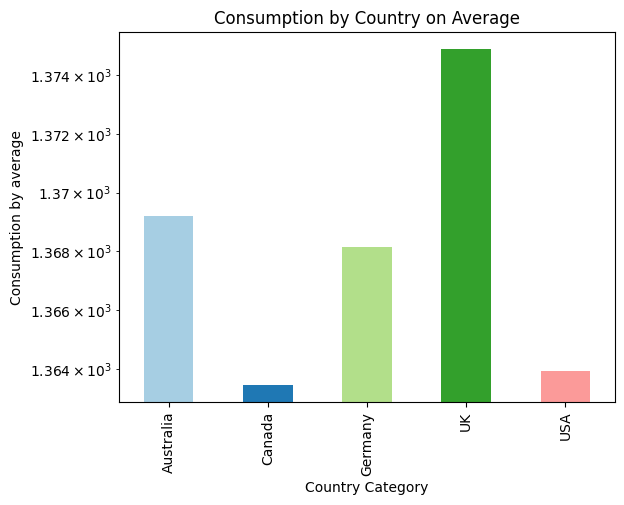

In [11]:
country_consumption_avg.plot(kind='bar', title='Consumption by Country on Average', color=plt.cm.Paired(range(len(country_consumption_avg))))
plt.xlabel('Country Category')
plt.ylabel('Consumption by average') 
plt.yscale('log') # Logarithmic scale to better visualize the differences since the values are very similar.
plt.show()

# CONCLUSION:  UK consumed the most by average. Even if there is a currency conversion, the UK still consumed the most, considering the EURO is heavier than the USD.

# Which country consumed the most.

In [12]:
country_consumption_total = df.groupby('Country')['Total_Amount'].sum()
print(country_consumption_total)


Country
Australia    6.047821e+07
Canada       6.014185e+07
Germany      7.036826e+07
UK           8.441618e+07
USA          1.265737e+08
Name: Total_Amount, dtype: float64


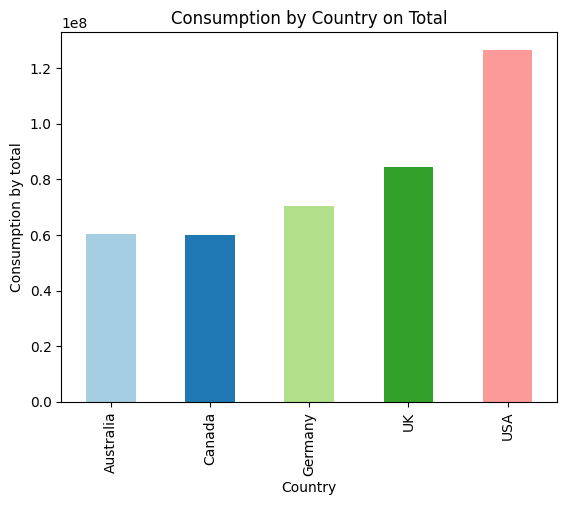

In [13]:
country_consumption_total.plot(kind='bar', title='Consumption by Country on Total', color=plt.cm.Paired(range(len(country_consumption_total))))
plt.xlabel('Country')
plt.ylabel('Consumption by total')
plt.show()

# CONCLUSION: USA as a whole consumes more than UK. But UK has higher spenders.

# Greatest Consumer by Month in 2023 .  (Omit 2024 because it has substantially less inputs than 2023)

        Month    Country  Total_Amount
24    January        USA  1.331577e+07
15   February  Australia  9.904097e+04
39      March        USA  8.087080e+06
4       April        USA  1.307168e+07
44        May        USA  9.939346e+06
34       June        USA  7.713146e+06
29       July        USA  1.068385e+07
9      August        USA  1.117998e+07
59  September        USA  7.825552e+06
54    October        USA  8.110482e+06
49   November        USA  7.615827e+06
14   December        USA  8.064147e+06


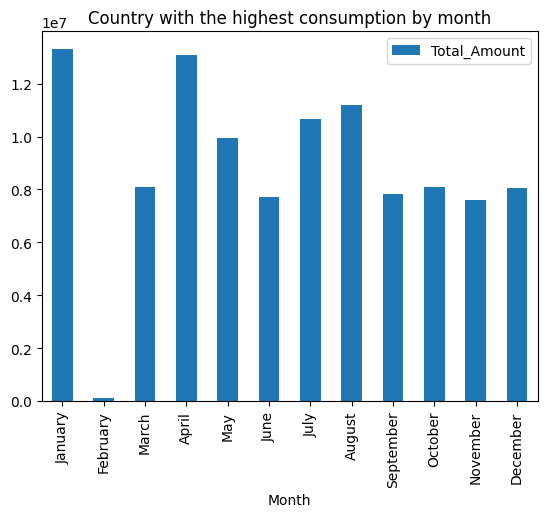

In [14]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
data2023 = df[df['Year'] == 2023]
monthly_consumption = data2023.groupby(['Month', 'Country'])['Total_Amount'].sum().reset_index()
max_consumers = monthly_consumption.loc[monthly_consumption.groupby('Month')['Total_Amount'].idxmax()]
max_consumers['Month'] = pd.Categorical(max_consumers['Month'], categories=month_order, ordered=True)
max_consumers = max_consumers.sort_values('Month')
print(max_consumers)

max_consumers.plot(kind='bar', x='Month', y='Total_Amount', title='Country with the highest consumption by month')
plt.show()